In [24]:
import numpy as np
import lumos.brdf.library
import lumos.brdf.tools
import lumos.plot
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import lumos.brdf 
B, C = lumos.brdf.tools.binomial_fit("chassis_brdf.csv", n = 1, m = 2, l1 = -5, l2 = 5, d = 3.0)

print("B = ", np.array_str(B, precision = 3))
print("C = ", np.array_str(C, precision = 3))

chassis_brdf = lumos.brdf.library.BINOMIAL(B, C, d = 3.0, l1 = -5)

B =  [[  3.34  -98.085]]
C =  [[-999.999  867.538 1000.    1000.    -731.248  618.552 -294.054  269.248
  -144.853   75.196]]


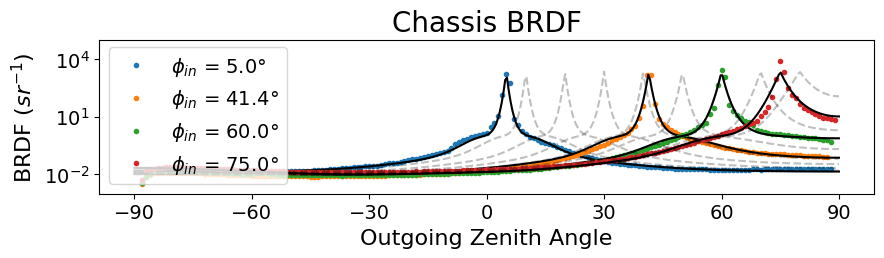

In [25]:
fig, ax = plt.subplots(figsize = (10, 2))


lumos.plot.plot_fit(ax, chassis_brdf, "chassis_brdf.csv")

ax.set_ylim(10e-4, 10e4)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_yticks([10e-3,10e-0, 10e3])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Outgoing Zenith Angle", fontsize = 16)
plt.ylabel(r"BRDF $(sr^{-1})$", fontsize = 16)
plt.title("Chassis BRDF", fontsize = 20)
plt.legend(fontsize = 14)
plt.show()

In [26]:
B, C = lumos.brdf.tools.binomial_fit("solar_array_brdf.csv", n = 1, m = 2, l1 = -3, l2 = 3, d = 3.0)

print("B = ", np.array_str(B, precision = 3))
print("C = ", np.array_str(C, precision = 3))

solar_array_brdf = lumos.brdf.library.BINOMIAL(B, C, d = 3.0, l1 = -3)

B =  [[  0.534 -20.409]]
C =  [[-527.765 1000.    -676.579  430.596 -175.806   57.879]]


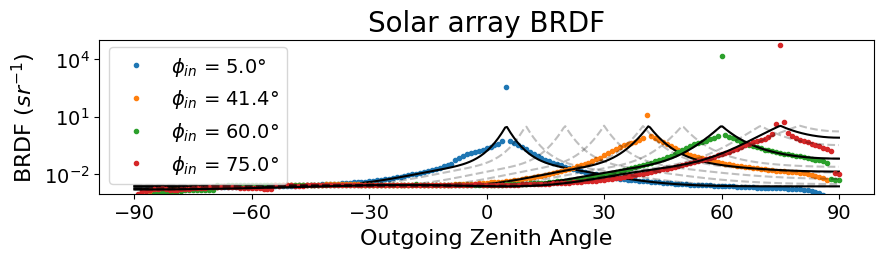

In [27]:
fig, ax = plt.subplots(figsize = (10, 2))


lumos.plot.plot_fit(ax, solar_array_brdf, "solar_array_brdf.csv")

ax.set_ylim(10e-4, 10e4)
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_yticks([10e-3,10e-0, 10e3])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Outgoing Zenith Angle", fontsize = 16)
plt.ylabel(r"BRDF $(sr^{-1})$", fontsize = 16)
plt.title("Solar array BRDF", fontsize = 20)
plt.legend(fontsize = 14)
plt.show()

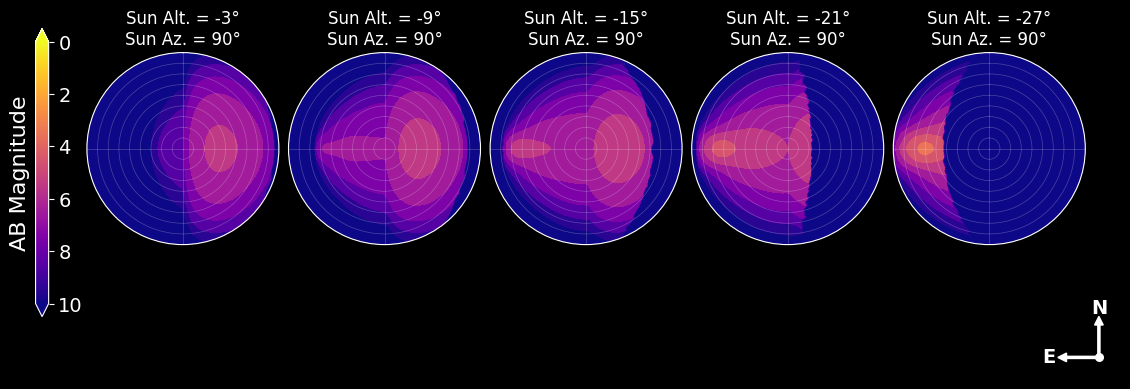

In [22]:
# Imports
from lumos.geometry import Surface
from lumos.brdf.library import BINOMIAL
import numpy as np

# This code implements two satellite models
# The first model is for a Starlink v1.5 satellite with
# laboratory measured BRDFs.
# The second model is for a Starlink v1.5 satellite with
# BRDFs inferred from on-orbit brightness observations.

# Constants
chassis_area = 3.65 # m^2
solar_array_area = 22 # m^2

chassis_normal = np.array([0, 0, -1])
solar_array_normal = np.array([0, 1, 0])


# ------------- Model with Lab Measured BRDFs -------------------------------------------------------
# These BRDFs were found by fitting to data measured by Scatterworks.
# The script for fitting is "lab_brdf_fits.ipynb"

B = np.array([[3.34, -98.085]])
C = np.array([[-999.999, 867.538, 1000., 1000., -731.248, 618.552, -294.054, 269.248, -144.853, 75.196]])
lab_chassis_brdf = BINOMIAL(B, C, d = 3.0, l1 = -5)

B = np.array([[0.534, -20.409]])
C = np.array([[-527.765, 1000., -676.579, 430.596, -175.806, 57.879]])
lab_solar_array_brdf = BINOMIAL(B, C, d = 3.0, l1 = -3)

SURFACES_LAB_BRDFS = [
    Surface(chassis_area, chassis_normal, lab_chassis_brdf),
    Surface(solar_array_area, solar_array_normal, lab_solar_array_brdf)
]




import lumos.plot

lumos.plot.brightness_summary_observer_frame(
    SURFACES_LAB_BRDFS,
    sat_height = 550 * 1000,
    sun_altitudes = [-3, -9, -15, -21, -27],
    sun_azimuths = [90, 90, 90, 90, 90],
    levels = (0, 10)
)

In [28]:
import lumos.calculator
import numpy as np

sat_height = 550 * 1000 # 550 kilometer geodetic height


sat_altitudes, sat_azimuths = \
    np.meshgrid(
    np.linspace(0, 90, 90), 
    np.linspace(0, 360, 180))

intensities = lumos.calculator.get_intensity_observer_frame(
        SURFACES_LAB_BRDFS, sat_height, sat_altitudes, sat_azimuths,
        sun_altitude = -27, sun_azimuth = 90,
        include_earthshine = False
    )
    
# Convert intensity to AB Magnitude
ab_magnitudes = lumos.conversions.intensity_to_ab_mag(intensities)

peak_ab_mag = ab_magnitudes.min()
idx = np.argmin(ab_magnitudes)
peak_alt = sat_altitudes.flatten()[idx]
peak_az = sat_azimuths.flatten()[idx]

print( f"Brightest: {peak_ab_mag:0.1f} AB Magnitude")
print( f"Altitude: {peak_alt:0.0f}°")
print( f"Azimuth: {peak_az:0.0f}°")

Brightest: 3.6 AB Magnitude
Altitude: 30°
Azimuth: 91°


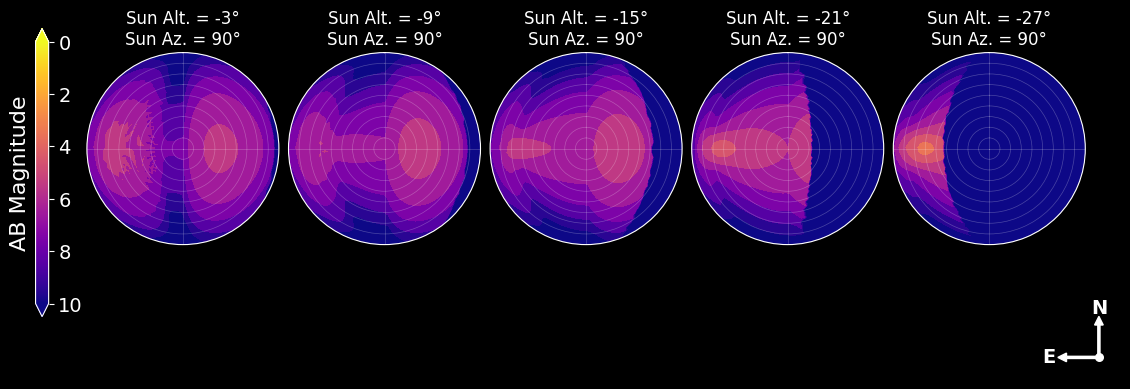

In [29]:
lumos.plot.brightness_summary_observer_frame(
    SURFACES_LAB_BRDFS,
    sat_height = 550 * 1000,
    sun_altitudes = [-3, -9, -15, -21, -27],
    sun_azimuths = [90, 90, 90, 90, 90],
    include_earthshine=True,
    earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31),
    levels = (0, 10)
)

In [31]:
import lumos.calculator
import numpy as np

sat_height = 550 * 1000 # 550 kilometer geodetic height


sat_altitudes, sat_azimuths = \
    np.meshgrid(
    np.linspace(0, 90, 90), 
    np.linspace(0, 360, 180))

intensities = lumos.calculator.get_intensity_observer_frame(
        SURFACES_LAB_BRDFS, sat_height, sat_altitudes, sat_azimuths,
        sun_altitude = -27, sun_azimuth = 90,
        include_earthshine = True,
        earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31)
    
    )
    
# Convert intensity to AB Magnitude
ab_magnitudes = lumos.conversions.intensity_to_ab_mag(intensities)

peak_ab_mag = ab_magnitudes.min()
idx = np.argmin(ab_magnitudes)
peak_alt = sat_altitudes.flatten()[idx]
peak_az = sat_azimuths.flatten()[idx]

print( f"Brightest: {peak_ab_mag:0.1f} AB Magnitude")
print( f"Altitude: {peak_alt:0.0f}°")
print( f"Azimuth: {peak_az:0.0f}°")

Brightest: 3.6 AB Magnitude
Altitude: 30°
Azimuth: 91°


In [19]:
import numpy as np
import lumos.brdf.tools
import matplotlib.pyplot as plt
import lumos.plot
from lumos.brdf.library import PHONG

Kd, Ks, n = lumos.brdf.tools.fit(
    "veg_test_brdf.csv",
    PHONG,
    bounds = (0, 1e4),
    p0 = (1, 1, 1))

print(f"{Kd = :0.2f}")
print(f"{Ks = :0.2f}")
print(f"{n = :0.2f}")

Kd = 0.43
Ks = 0.22
n = 6.69


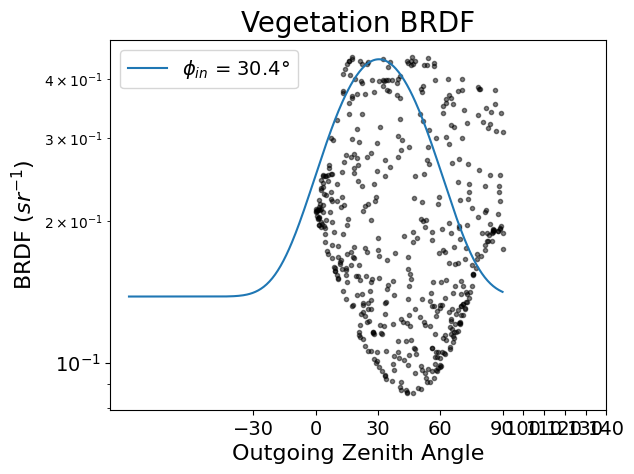

In [24]:
fig, ax = plt.subplots()

phi_i, theta_i, phi_o, theta_o, brdf = lumos.brdf.tools.read_brdf("veg_test_brdf.csv")
ax.semilogy(phi_o, brdf, 'k.', alpha = 0.5, zorder = 2)
lumos.plot.BRDF_1D(ax, PHONG(Kd, Ks, n), incident_angles =np.unique(phi_i))

ax.set_xticks([-30, 0, 30, 60, 90, 100, 110, 120, 130, 140])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Outgoing Zenith Angle", fontsize = 16)
plt.ylabel(r"BRDF $(sr^{-1})$", fontsize = 16)
plt.title("Vegetation BRDF", fontsize = 20)
plt.legend(fontsize = 14)
plt.show()